## Example using MultiOutput

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
import numpy as np
import pickle


# Distance dataset
# Input (meters)
# distance = np.array([[2.0], [2.25], [2.5], [2.75], [3.0], [3.25], [3.5], [3.7], 
#                      [4.0], [4.3], [4.6], [4.8], [5.0], [5.2], [5.5], [5.75], 
#                      [6.0], [6.3], [6.5], [6.8], [7.0], [7.3], [7.5], [7.8], 
#                      [8.0], [8.2], [8.5], [9.0], [9.6], [10.0], [10.5], [10.8]])

distance = np.array([[1.80], [2.00], [2.21], [2.42], [2.61], [2.84],
                     [3.03], [3.30], [3.58], [3.82], [4.02], [4.32],
                     [4.56], [5.04], [5.44], [5.64], [5.90], [6.21],
                     [6.40], [6.66], [7.01]])



# Output
# Shooter speed (RPM), Hood angle (deg)
# output = np.array([[3000, 80], [3000, 75], [3000, 70], [3000, 65], [3300, 60], [3300, 57], [3300, 56], [3300, 55], 
#                    [3300, 54], [3300, 53], [3600, 53], [3600, 52], [3600, 51], [3700, 51], [3700, 50], [3800, 50], 
#                    [3800, 49], [3900, 49], [3900, 48], [3900, 47], [4100, 47], [4200, 47], [4200, 47], [4400, 47], 
#                    [4400, 46], [4500, 46], [4600, 46], [4700, 45], [4800, 45], [4900, 45], [5000, 45], [5600, 30]])

output = np.array([[2300, 1648], [2350, 1670], [2400, 1590], [2450, 1508], [2500, 1452], [2550, 1408],
                   [2600, 1346], [2650, 1316], [2700, 1305], [2750, 1223], [2800, 1202], [2850, 1170],
                   [3000, 1073], [3100, 1020], [3200, 861],  [3300, 757],  [3400, 595],  [3600, 482],
                   [3800, 330],  [4200, 90],   [4400, 0]])


# Verification set
# distance2 = np.array([[3.0], [3.2], [3.4], [3.6], [3.8], [4.0], [4.2], [4.4], [4.6], 
#                       [4.8], [5.0], [5.2], [5.4], [5.6], [5.8], [6.0], [6.2], [6.4], 
#                       [6.6], [6.8], [7.0], [7.2], [7.4], [7.6], [7.8], [8.0], [8.2], 
#                       [8.4], [8.6], [8.8], [9.0], [9.2], [9.4], [9.6], [9.8], [10.0]])

distance2 = np.array([[3.0], [3.2], [3.4], [3.6], [3.8], [4.0], [4.2], [4.4], [4.6], 
                      [4.8], [5.0], [5.2], [5.4], [5.6], [5.8], [6.0], [6.2], [6.4], 
                      [6.6], [6.8]])

knn = KNeighborsRegressor(n_neighbors=2, weights='distance', algorithm='auto', 
                          leaf_size=30, p=2, metric='minkowski', metric_params=None, 
                          n_jobs=None)

regr = MultiOutputRegressor(knn)

regr.fit(distance, output)

output2 = regr.predict(distance2)

print(output2)

filename = 'shooterModel.sav'
pickle.dump(regr, open(filename, 'wb'))

[[2592.10526316 1355.78947368]
 [2631.48148148 1327.11111111]
 [2667.85714286 1312.07142857]
 [2704.16666667 1298.16666667]
 [2745.83333333 1229.83333333]
 [2795.         1204.1       ]
 [2830.         1182.8       ]
 [2900.         1137.66666667]
 [2981.25       1085.125     ]
 [3050.         1046.5       ]
 [3091.66666667 1024.41666667]
 [3140.          956.4       ]
 [3214.28571429  846.14285714]
 [3280.          777.8       ]
 [3361.53846154  657.30769231]
 [3464.51612903  558.5483871 ]
 [3609.52380952  474.76190476]
 [3800.          330.        ]
 [4107.69230769  145.38461538]
 [4280.           54.        ]]


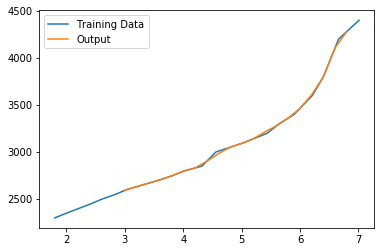

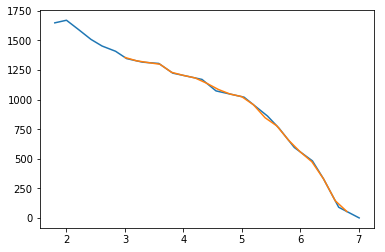

In [3]:
import matplotlib
matplotlib.use('Qt5agg')
import matplotlib.pyplot as plt
%matplotlib inline

_, plt1 = plt.subplots()

plt1.plot(distance, output[:,0])
plt1.plot(distance2, output2[:,0])
plt1.legend(["Training Data", "Output"])

_, plt2 = plt.subplots()

plt2.plot(distance, output[:,1])
plt2.plot(distance2, output2[:,1])
plt1.legend(["Training Data", "Output"])